<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON HOTEL BOOKING DEMAND 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Analyzing Questions 📌
</div>

## **IMPORT LIBRARY** 🎄<a class="anchor" id="c1"></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **EXPLORING DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 1: Read cleaned data from clean_data folder 🔥
</div>

In [31]:
pd.set_option('display.max_columns', None)
hotel_booking_df = pd.read_csv('./data/clean_data/processed_data.csv')
hotel_booking_df.head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type
0,False,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
1,False,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,False,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
2,False,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,False,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
3,False,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotel
4,False,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,resort hotel
5,False,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,False,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,resort hotel
6,True,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,resort hotel
7,True,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,resort hotel
8,True,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,E,E,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,resort hotel
9,False,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,240.0,0,Transient,145.0,0,0,Check-Out,2015-07-05,resort hotel


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 2: Describe the correlation between features in the dataset 🔥
</div>

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

🔍 First we need to extract number and datetime columns.

In [32]:
booking_num_df = hotel_booking_df.select_dtypes(include=['number', 'datetime'])

🔍 Now we will plot the correlations.

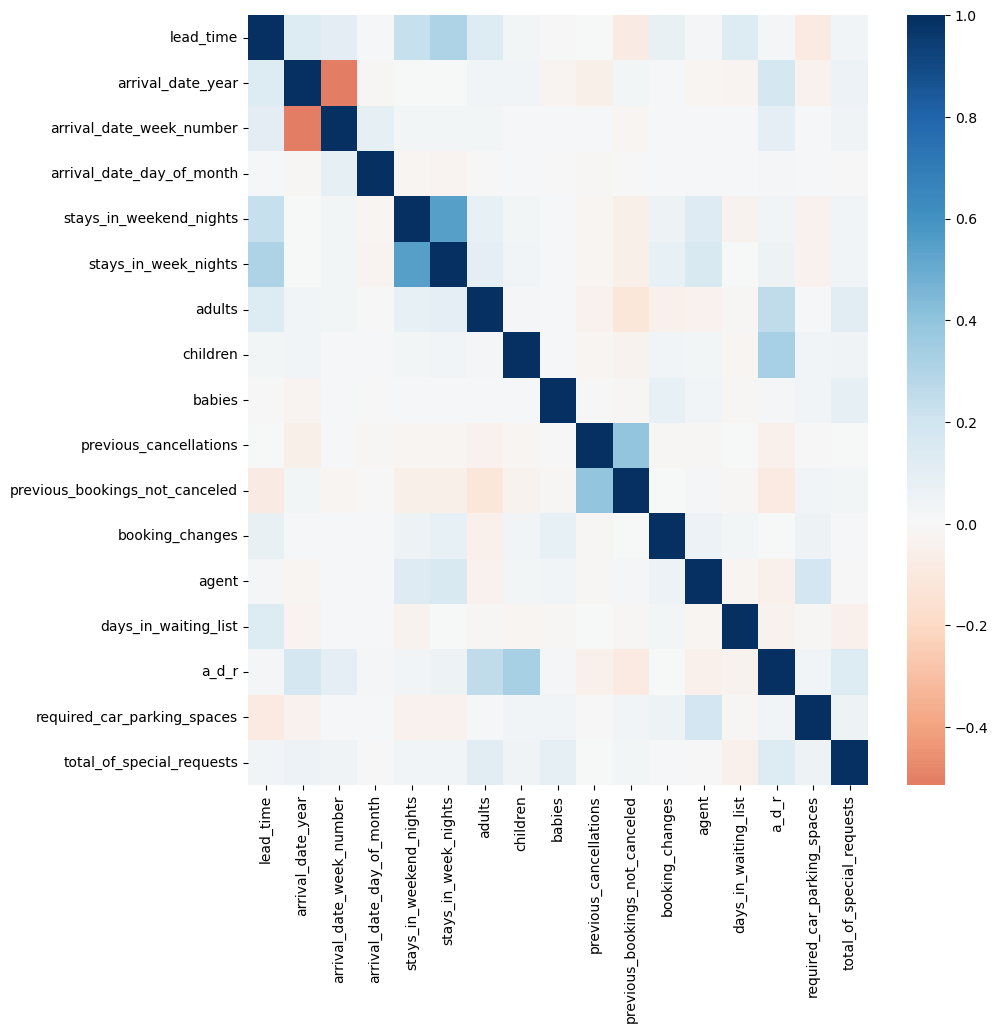

In [33]:
# Plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(booking_num_df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### **OBSERVATION** 💬

* At first look, all the features have really weak correlations with other features. This means that maybe there are no linear relationships between our features.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FF90BC; padding: 20px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0">
  STEP 3: Coming to the QUESTION SECTION 🔥
</div>

## **Question 1** 🔔

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

❓  **A possible question is:** Which time of the year has most concellations?

✅  **Answering this question will** help the owners to know when most of the concellations occur in order for them to have appropriate policies to stabilize their hotel's revenue. 

💡  **How we answer this question**:    
 
- Extract data of the time columns including `arrival_date_year`, `arrival_date_week_number`, `arrival_date_month`, `arrival_date_day_of_month`.   
- Count for number of cancellations on specific time of the year.(based on month, day of the year, etc)   
- Plot to see the distribution of concellations on these times.   
- Create model to predict the number of cancellations on the next years.   

### **Preprocess data** 📝

First we will extract all the time columns with `is_canceled` column.

In [34]:
time_df = hotel_booking_df[['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                            'arrival_date_day_of_month']]
time_df.head(5)

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,False,2015,July,27,1
1,False,2015,July,27,1
2,False,2015,July,27,1
3,False,2015,July,27,1
4,False,2015,July,27,1


Then let's see if these columns are in their correct data types.

In [35]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87394 entries, 0 to 87393
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   is_canceled                87394 non-null  bool  
 1   arrival_date_year          87394 non-null  int64 
 2   arrival_date_month         87394 non-null  object
 3   arrival_date_week_number   87394 non-null  int64 
 4   arrival_date_day_of_month  87394 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 2.8+ MB


### **Analyzing**  📝

#### **Cancellation Status**

🔍  First we will see the distribution of the number of cancellations.

In [36]:
cancellations = time_df['is_canceled'].value_counts(normalize=True)
cancellations

is_canceled
False    0.725096
True     0.274904
Name: proportion, dtype: float64

In [37]:
cancellations = time_df['is_canceled'].value_counts()
cancellations

is_canceled
False    63369
True     24025
Name: count, dtype: int64

👀  Visualization for clearer view.

Text(0.5, 1.0, 'HOTEL CANCELLATION STATUS')

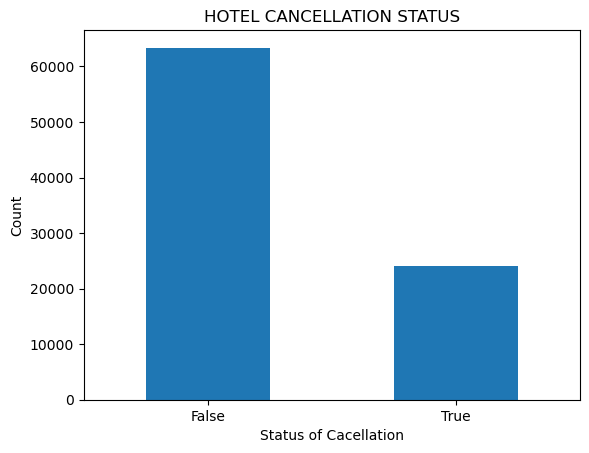

In [38]:
cancellations.plot.bar(rot=0)
plt.xlabel('Status of Cacellation')
plt.ylabel('Count')
plt.title('HOTEL CANCELLATION STATUS')

- Here we can see that the rate of cancellation is about 24% of the total bookings.
- This number is just equal to 1/4 of the total.

#### **Lets find in which month was the hotel cancellations high**

In the column `arrival_date_month`, we have 12 unique values represent for 12 months of a year.

🧮 We will count for number of bookings for each month as well as number of cancellations.

In [39]:
# Extract canceled and month columns
month_df = time_df[['is_canceled', 'arrival_date_month']]

# Count
month_count = month_df.groupby('arrival_date_month').value_counts()

# Save to new df
cancel_month_df = month_count.unstack()

# Rearrange the index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancel_month_df = cancel_month_df.reindex(months)
cancel_month_df

is_canceled,False,True
arrival_date_month,,
January,3655,1038
February,4682,1415
March,5683,1830
April,5499,2409
May,5913,2442
June,5411,2354
July,6858,3198
August,7634,3623
September,5048,1642


👀  Visualization for clearer view.

Text(0.5, 1.0, 'Cancellations over Months')

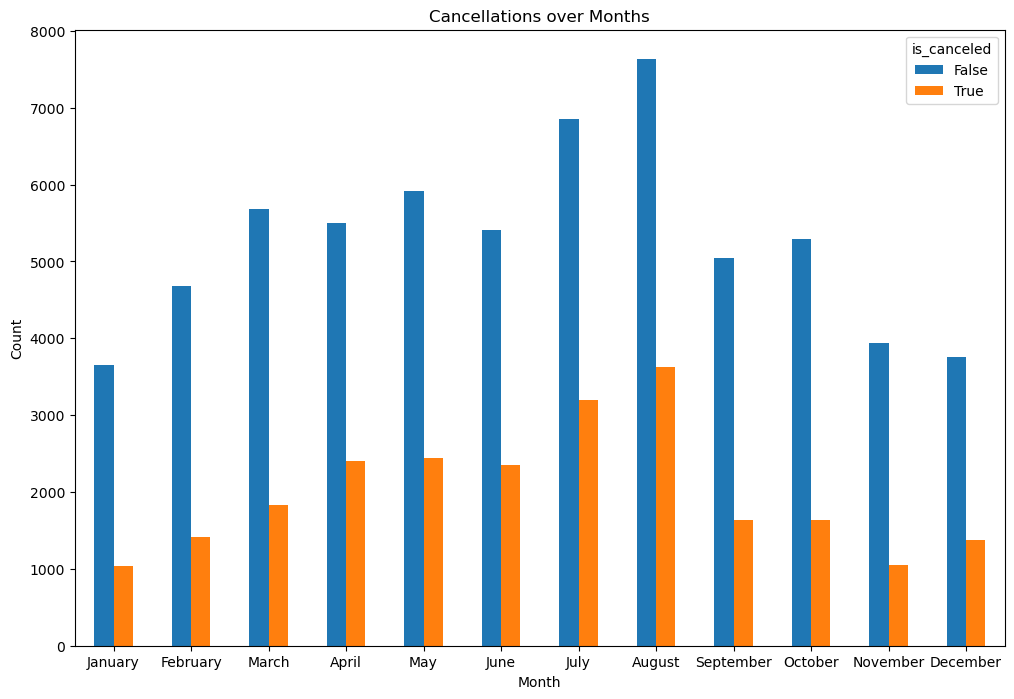

In [40]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_month_df.plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Cancellations over Months')

🔍 August and July have the highest cancellation among all months. They also has the highest bookings. It seems like most people like to travel during these months which also fall into the summer season.   
🔍 November, December and January have the lowest bookings. These months fall into the winter and spring season when the weather is still cold, so probably people don't want to traval much.


#### **Lets find in which time of the month was the hotel cancellations high**

For the column `arrival_date_day_of_month` we have 31 values represent for each day of a month.

🧮 We will count for number of bookings for each day of month as well as number of cancellations.

In [41]:
# Extract canceled and day of month columns
day_df = time_df[['is_canceled', 'arrival_date_day_of_month']]

# Count
day_count = day_df.groupby('arrival_date_day_of_month').value_counts()

# Save to new df
cancel_day_df = day_count.unstack()

# Sort the df by cancellation
cancel_day_df = cancel_day_df.sort_values(True, ascending=False)
cancel_day_df


is_canceled,False,True
arrival_date_day_of_month,,
26,2113,887
17,2145,875
27,2053,849
28,2087,842
29,2040,840
16,2126,833
1,1950,819
8,1998,811
2,2208,808


👀  Since we just consider the days with highest cancellation, we will plot the top 10 days.

Text(0.5, 1.0, 'Cancellations over Days of month')

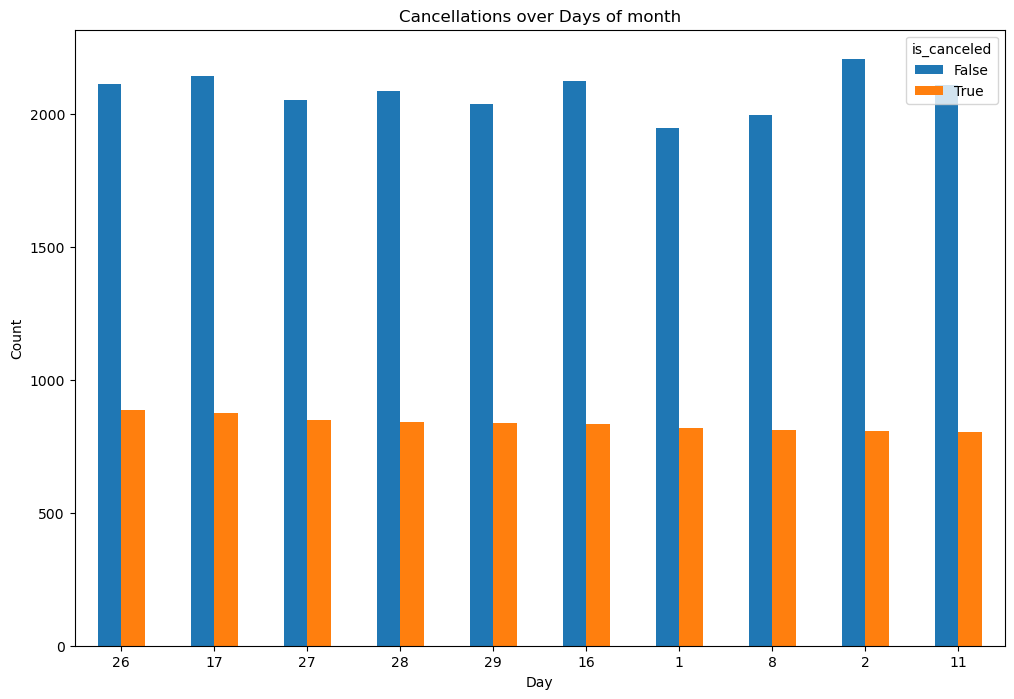

In [42]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_day_df.head(10).plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Cancellations over Days of month')

🔍 As can be seen, the number of cancellations on each day is not much different at all.   
🔍 Most cancellations fall into the end of month which are 26, 27, 28 and 29.

- Since there are some holidays in the year, we want to know the cancellation on specific day so we will combile the day and month column to see this.

#### **Lets find in which specific day of year was the hotel cancellations high**

🌸 First we will add another column show for specific day by combining the day, month and year column. To do this we need to convert the month column into number.

In [43]:
# Mapping dictionary for month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert the month column to numerical values using the mapping
time_df['arrival_date_month'] = time_df['arrival_date_month'].map(month_mapping)
time_df

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_50829/4201829474.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['arrival_date_month'] = time_df['arrival_date_month'].map(month_mapping)


,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,False,2015,7,27,1
1,False,2015,7,27,1
2,False,2015,7,27,1
3,False,2015,7,27,1
4,False,2015,7,27,1
...,...,...,...,...,...
87389,False,2017,8,35,30
87390,False,2017,8,35,31
87391,False,2017,8,35,31
87392,False,2017,8,35,31


- Then we combine the day, month and year column into one new column.

In [44]:
# Combine day, month, and year columns into a new 'Date' column with format 'dd/mm/yyyy'
time_df['specific_date'] = time_df['arrival_date_day_of_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_year'].astype(str)

# Convert 'Date' column to datetime format
time_df['specific_date'] = pd.to_datetime(time_df['specific_date'], format='%d/%m/%Y')
time_df

/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_50829/3390460666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['specific_date'] = time_df['arrival_date_day_of_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_month'].astype(str).str.zfill(2) + '/' + time_df['arrival_date_year'].astype(str)
/var/folders/m1/4jn3yq_d745fxmxbkhw7ts380000gn/T/ipykernel_50829/3390460666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['specific_date'] = pd.to_datetime(time_df['spec

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,specific_date
0,False,2015,7,27,1,2015-07-01
1,False,2015,7,27,1,2015-07-01
2,False,2015,7,27,1,2015-07-01
3,False,2015,7,27,1,2015-07-01
4,False,2015,7,27,1,2015-07-01
...,...,...,...,...,...,...
87389,False,2017,8,35,30,2017-08-30
87390,False,2017,8,35,31,2017-08-31
87391,False,2017,8,35,31,2017-08-31
87392,False,2017,8,35,31,2017-08-31


- We group by specific date to count for number of bookings and cancellations.

In [45]:
# Extract cancel and date column
dmy_df = time_df[['is_canceled', 'specific_date']]

# Group by date to count
dmy_count = dmy_df.groupby('specific_date').value_counts().unstack()

# Split true and false
true_count = dmy_count[True]
false_count = dmy_count[False]

👀 Now let's plot 2 line graphs to show cancellations over time.

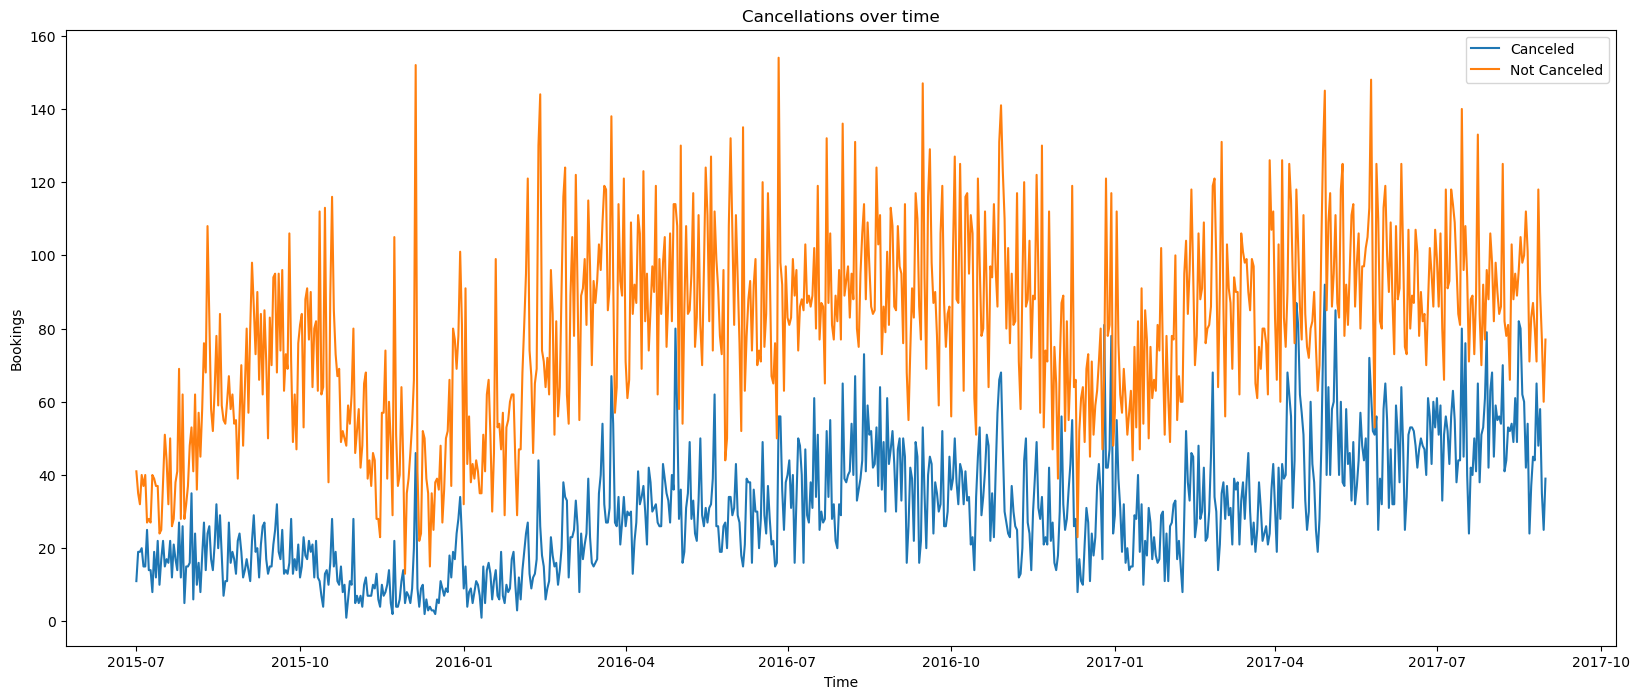

In [46]:
plt.figure(figsize = (20,8))
plt.plot(true_count.index, true_count.values, label = 'Canceled')
plt.plot(false_count.index, false_count.values, label = 'Not Canceled')
plt.title('Cancellations over time')
plt.xlabel('Time')
plt.ylabel('Bookings')
plt.legend()

- In the later years, it seems like the number of cancellations had increased but not too much also the number of bookings.
- These cancellations may be influenced by factors such as seasonality, local events, or demand fluctuations.

#### **Lets find in which week was the hotel cancellations high**

🌸 We will do the same thing just like month and day.

In [47]:
# Extract canceled and week columns
week_df = time_df[['is_canceled', 'arrival_date_week_number']]

# Count
week_count = week_df.groupby('arrival_date_week_number').value_counts()

# Save to new df
cancel_week_df = week_count.unstack()

# Sort the df by cancellation
cancel_week_df = cancel_week_df.sort_values(True, ascending=False)
cancel_week_df

is_canceled,False,True
arrival_date_week_number,,
33,1870,923
32,1666,783
34,1716,775
30,1571,764
28,1596,748
31,1552,735
18,1377,712
27,1456,709
29,1516,681


Text(0.5, 1.0, 'Cancellations over weeks')

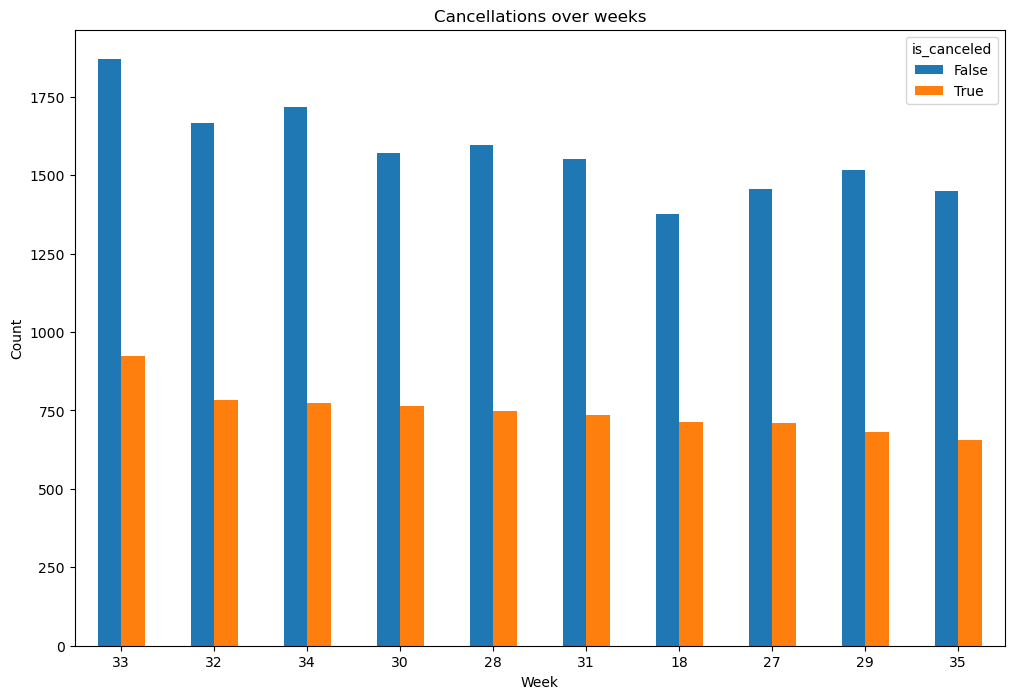

In [48]:
# Set up ax
fig, ax = plt.subplots(figsize=(12, 8))

# Plot group bar chart
cancel_week_df.head(10).plot(kind='bar', width=0.5, ax=ax, rot=0)

# Set x, y labels and title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Cancellations over weeks')

- Most of the cancellations and bookings fall into week number 30 to 34. 
- Assume that a month has 4 weeks, so week number 30 to 34 will fall into August and September. 
- Compared to the month chart we have plotted above, it seems like the bars are pretty similar. For the month chart, the highest cancellations fall into August and July. The difference between these 2 charts is beacause 4 weeks only have 28 days while there are months that are 30 or 31 days, so our observation maybe a little bit different.

## 📈 Final observations:

- It is clear that the highest bookings fall into September and August. This also lead to the high number of cancellations. So in these months of the year, the hotel's owners should be focus on their hotel policies as well as customer services in order to keep the number of customers.
- Also the number of cancellations also goes high at the end of each month.